In [54]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [55]:
import seaborn as sns

In [56]:
df_org=df.copy()

In [57]:
df = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='Poland')]
df = df.dropna(subset='salary_year_avg')


In [58]:
df_hist=df.copy()

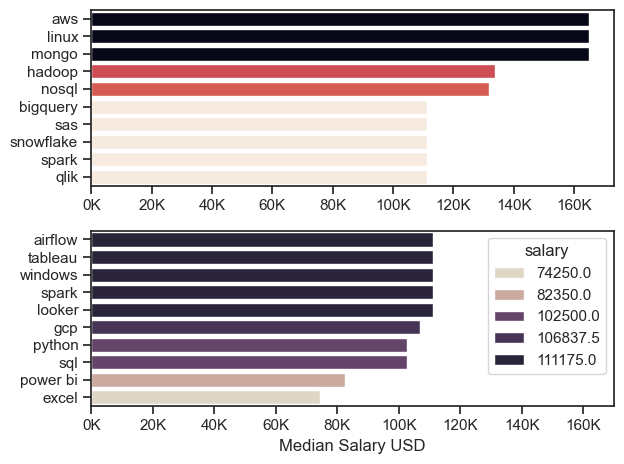

In [ ]:
fig, ax = plt.subplots(2,1)
#df_sallary[::-1].plot(kind='barh',y='salary', ax=ax[0], title =('Top 10 paid DA skills in Poland') )


sns.set_theme(style='ticks')
sns.barplot(data=df_sallary, x='salary', y=df_sallary.index, ax=ax[0], hue='salary', palette='rocket_r')
# w kolor palet jak mamy na końcu _r to robi reverse of colours 
# w zaleznosci co przypiszemy do x a co do y albo bedzie bar chart albo horizontal bar chart

ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().set_visible(False)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

#hue w seaborn plot pozwala wybrac po ktorej wartosci/kolumnie ma byc kolor

#df_skills[::-1].plot(kind='barh', y='salary',ax=ax[1],title =('Top 10 demadned DA skills in Poland'), legend=False)
sns.barplot(data=df_skills, x='salary', y=df_skills.index, ax=ax[1],hue='salary', palette='ch:s=-.2,r=.6')

ax[1].set_xlim(0,170000)
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary USD')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
#for a in ax:
 #   a.invert_yaxis()

fig.tight_layout()

plt.show()

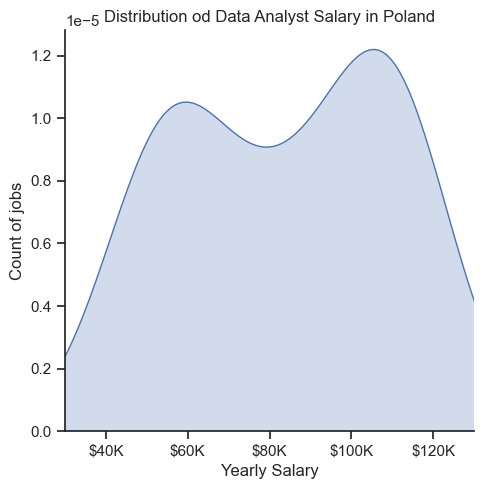

In [60]:
#df_hist['salary_year_avg'].plot(kind='hist', bins=25, edgecolor = 'black')
sns.displot(data=df_hist['salary_year_avg'], kind='kde', fill =True)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(30000,130000)
plt.xlabel('Yearly Salary')
plt.ylabel('Count of jobs')
plt.title('Distribution od Data Analyst Salary in Poland')
plt.show()

In [66]:
job_tit = ['Data Analyst', 'Data Scientist', 'Data Engineer']


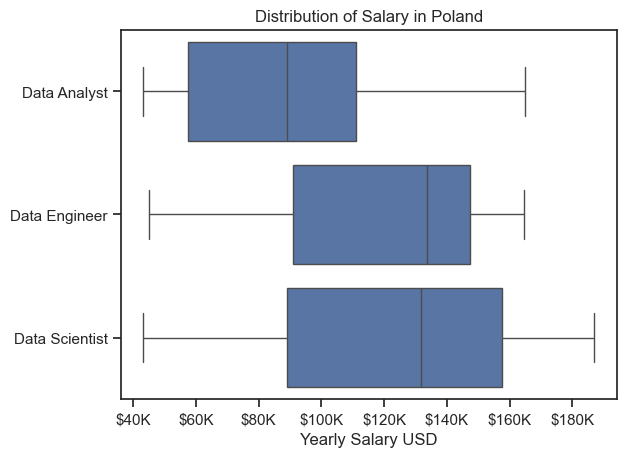

In [76]:
df_box = df_org[(df_org['job_title_short'].isin(job_tit)) & (df_org['job_country']=='Poland')].copy()
df_box = df_box.dropna(subset=['salary_year_avg']).copy()

sns.boxplot(data=df_box, x='salary_year_avg', y='job_title_short')

plt.xlabel("Yearly Salary USD")
plt.title('Distribution of Salary in Poland')
plt.ylabel('')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()